In [2]:
import json
import numpy as np
import rich

In [3]:
with open("taskeval_actual_movement_coop_with_actual_move.json", 'r') as f:
    with_actual = json.load(f)
    
with open("taskeval_llama_dialogue_coop_with_actual.json", 'r') as f:
    llama_with_actual = json.load(f)
    
with open("taskeval_llama_dialogue_coop_with_actual_end_0.json", 'r') as f:
    llama_with_actual_end_0 = json.load(f)
    
with open("taskeval_human_dialogue_coop.json", 'r') as f:
    human = json.load(f)

with open("taskeval_human_dialogue_coop_end_0.json", 'r') as f:
    human_cut = json.load(f)

countries_list = ['Austria', 'England', 'France', 'Germany', 'Italy', 'Russia', 'Turkey']

In [4]:
def get_score_with_env(countries, prediction):
    scores = 0
    for c in countries:
        scores += prediction[c][c.upper()][1]
    score_dict = {}
    score_dict['env'] = prediction['env_uuid']
    score_dict['scores'] = scores / len(countries)
    return score_dict

def get_score_dict_from_dialogue(dialogue):
    score_list = []
    for a in dialogue:
        keys = []
        for vkeys in a.keys():
            if vkeys in countries_list:
                keys.append(vkeys)
        score_list.append(get_score_with_env(keys, a))
    return score_list

In [5]:
with_actual_score = get_score_dict_from_dialogue(with_actual)
high_with_actual_score = [d for d in with_actual_score if d['scores'] >= 0.02]
llama_with_actual_score = get_score_dict_from_dialogue(llama_with_actual)
llama_with_score_end_0 = get_score_dict_from_dialogue(llama_with_actual_end_0)
human_score = get_score_dict_from_dialogue(human)
human_cut_score = get_score_dict_from_dialogue(human_cut)

/tmp/ipykernel_2385527/730683369.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1, shade=True, color='skyblue', alpha=0.9, linewidth=2, label='With Human Dialogue')
/tmp/ipykernel_2385527/730683369.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2, shade=True, color='green', alpha=0.4, linewidth=2, label='Without Human Dialogue')


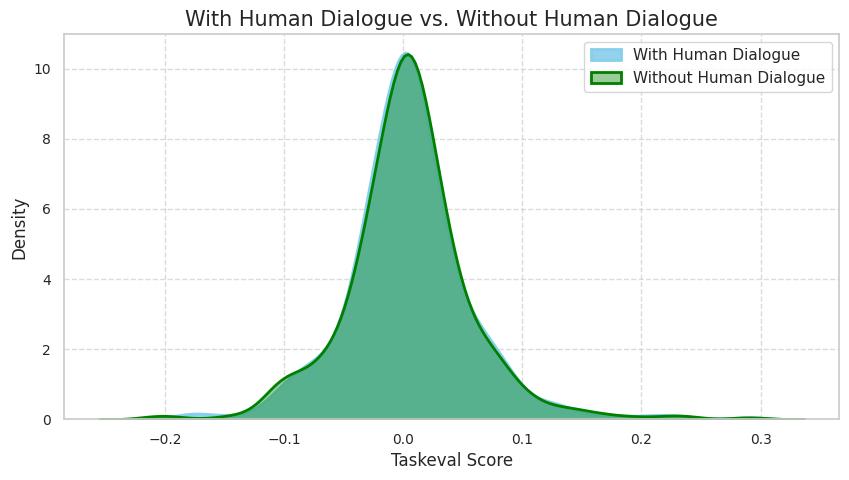

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# TODO: add comparison between human and actual movement
data1 = [d['scores'] for d in human_score]
data2 = [d['scores'] for d in human_cut_score]

sns.set(style="whitegrid")

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data1, shade=True, color='skyblue', alpha=0.9, linewidth=2, label='With Human Dialogue')
sns.kdeplot(data2, shade=True, color='green', alpha=0.4, linewidth=2, label='Without Human Dialogue')

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
# for percentile in percentiles:
#     score1 = np.percentile(data1, percentile)
#     plt.axvline(x=score1, color='red', linestyle='--', label=f'with plausible - {percentile}th: {score1:.2f}')
#     score2 = np.percentile(data2, percentile)
#     plt.axvline(x=score2, color='purple', linestyle='--', label=f'without plausible - {percentile}th: {score2:.2f}')

plt.title('With Human Dialogue vs. Without Human Dialogue', fontsize=15)
plt.xlabel('Taskeval Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


/tmp/ipykernel_1010183/1082192750.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data3, shade=True, color='purple', alpha=0.7, linewidth=2, label='Llama without dialogue')
/tmp/ipykernel_1010183/1082192750.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1, shade=True, color='skyblue', alpha=0.9, linewidth=2, label='High Acutal Movement')
/tmp/ipykernel_1010183/1082192750.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2, shade=True, color='green', alpha=0.5, linewidth=2, label='Llama with Actual Movement')


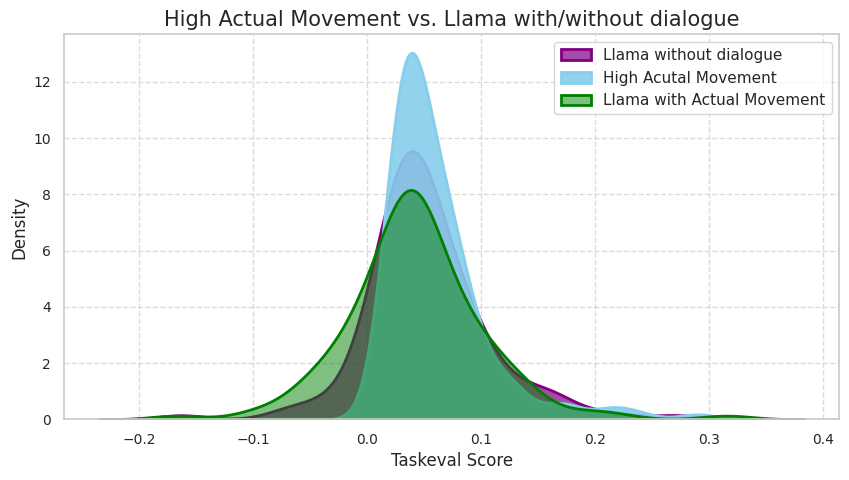

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# TODO: add comparison between human and actual movement
# data1 = [d['scores'] for d in human_few_shot_score_dict if d['scores'] >= 0.06]
data1 = [d['scores'] for d in high_with_actual_score]
data2 = [d['scores'] for d in llama_with_actual_score]
data3 = [d['scores'] for d in llama_with_score_end_0]

sns.set(style="whitegrid")

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data3, shade=True, color='purple', alpha=0.7, linewidth=2, label='Llama without dialogue')
sns.kdeplot(data1, shade=True, color='skyblue', alpha=0.9, linewidth=2, label='High Acutal Movement')
sns.kdeplot(data2, shade=True, color='green', alpha=0.5, linewidth=2, label='Llama with Actual Movement')

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
# for percentile in percentiles:
#     score1 = np.percentile(data1, percentile)
#     plt.axvline(x=score1, color='red', linestyle='--', label=f'with plausible - {percentile}th: {score1:.2f}')
#     score2 = np.percentile(data2, percentile)
#     plt.axvline(x=score2, color='purple', linestyle='--', label=f'without plausible - {percentile}th: {score2:.2f}')

plt.title('High Actual Movement vs. Llama with/without dialogue', fontsize=15)
plt.xlabel('Taskeval Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [13]:
def sub_score(score_list_1, score_list_2):
    model_score_dict = {item['env']: item['scores'] for item in score_list_2}
    results = []
    for item in score_list_1:
        env = item['env']
        score1 = item['scores']
        score2 = model_score_dict.get(env)
        if score2 == None:
            continue
        results.append({"env": item['env'], "scores": score1 - score2})
    return results


In [15]:
sub = sub_score(llama_with_score_end_0, llama_with_actual_score)
len(sub)

139

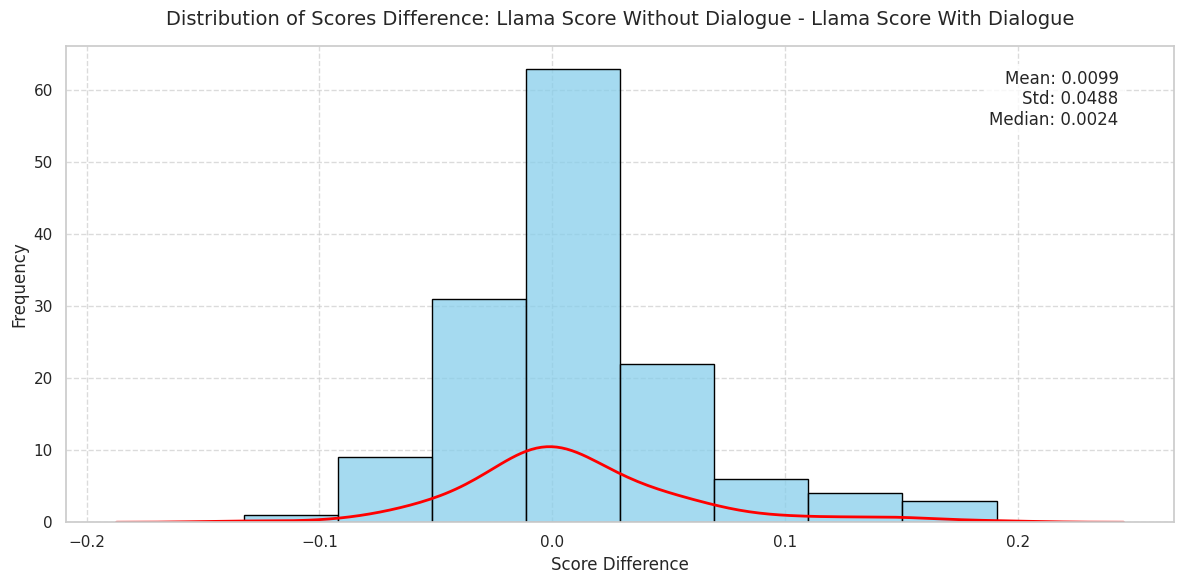

In [17]:
import pandas as pd
df = pd.DataFrame(sub)
scores = df['scores']

plt.style.use('default')
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.histplot(data=scores, bins=8, color='skyblue', edgecolor='black')

sns.kdeplot(data=scores, color='red', linewidth=2)

plt.title('Distribution of Scores Difference: Llama Score Without Dialogue - Llama Score With Dialogue', fontsize=14, pad=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

stats_text = f'Mean: {scores.mean():.4f}\nStd: {scores.std():.4f}\nMedian: {scores.median():.4f}'
plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

plt.show()